In [1]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import databaseconfig as cfg

In [2]:
pwd = cfg.postgresql['pwd']
host = cfg.postgresql['host']
db = cfg.postgresql['db']

con_string = f"postgresql://postgres:{pwd}@{host}/{db}"
engine = create_engine(con_string)
connection = engine.connect()

In [3]:
results = pd.read_sql('SELECT e.salary As Salarie FROM salaries e', connection)

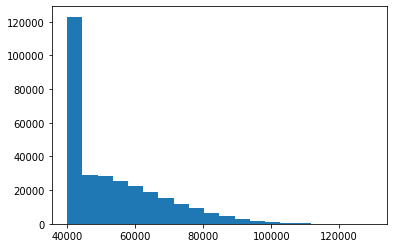

In [4]:
n, bins, patches=plt.hist(results['salarie'], bins=20)

In [13]:
sql = 'SELECT t.title, AVG(e.salary) FROM salaries e INNER JOIN titles t ON e.emp_no = t.emp_no GROUP BY t.title'
titles = pd.read_sql(sql, connection)
avg_titles = pd.DataFrame(titles, columns=['title', 'avg'])

Text(0, 0.5, 'Job Title')

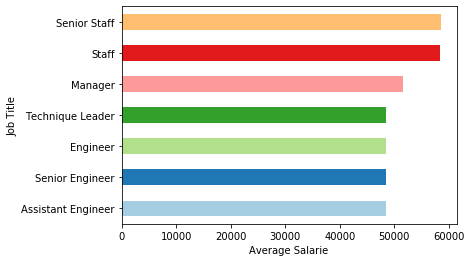

In [14]:
ax = avg_titles.sort_values(by=['avg']).plot.barh('title','avg', legend=False, color=plt.cm.Paired(np.arange(len(avg_titles))))
ax.set_xlabel("Average Salarie")
ax.set_ylabel("Job Title")